# What's your next game project 

## Step 1: Data Exploration

**Dataset Overview:**

- What is the size of the dataset?
- What are the features (columns) present in the dataset?
- What does each feature represent?
- Are there any missing values in the dataset?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Loading the dataset 
path = 'apps_data.csv'
df = pd.read_csv(path)

In [4]:
print("The size of the dataset  : "  , df.shape)

The size of the dataset  :  (10841, 13)


In [5]:
print("The columns 'features' : " , df.columns)

The columns 'features' :  Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


**Description of each column** 


| variable       | class     | description                                                                  |
|:---------------|:----------|:-----------------------------------------------------------------------------|
| App            | character | The application name                                                         |
| Category       | character | The category the app belongs to                                              |
| Rating         | numeric   | Overall user rating of the app                                               |
| Reviews        | numeric   | Number of user reviews for the app                                           |
| Size           | character | The size of the app                                                          |
| Installs       | character | Number of user installs for the app                                          |
| Type           | character | Either "Paid" or "Free"                                                      |
| Price          | character | Price of the app                                                             |
| Content Rating | character | The age group the app is targeted at - "Children" / "Mature 21+" / "Adult"   |
| Genres         | character | Possibly multiple genres the app belongs to                                  |
| Last Updated   | character | The date the app was last updated                                            |
| Current Ver    | character | The current version of the app                                               |
| Android Ver    | character | The Android version needed for this app                                      |


In [6]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

## Step 02 : Data Cleaning

In [7]:
# Subsetting the dataset to include only games
games_df = df[df['Category'] == 'GAME']

In [8]:
games_df.isnull().sum()

App                0
Category           0
Rating            47
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        0
Android Ver        0
dtype: int64

In [9]:
games_df['Rating']

1653     4.5
1654     4.5
1655     4.4
1656     4.7
1657     4.5
        ... 
10791    4.0
10792    4.2
10793    4.4
10803    4.3
10804    4.2
Name: Rating, Length: 1144, dtype: float64

In [10]:
# Imputing missing values in the 'Rating' column using KNN
from sklearn.impute import KNNImputer

# Creating an instance of KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Since KNNImputer works with numerical data, we'll select only the numerical columns for imputation
numerical_cols = games_df.select_dtypes(include=['float64', 'int64']).columns

# Fitting the imputer and transforming the data
games_df[numerical_cols] = imputer.fit_transform(games_df[numerical_cols])

# Checking if there are any missing values left in the 'Rating' column
games_df['Rating'].isnull().sum()

0

In [11]:
games_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258,23M,"10,000,000+",Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up


In [12]:
#Removing the 'Category' column
games_df.drop('Category', axis=1, inplace=True)

In [13]:
games_df.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,4.7,254258,23M,"10,000,000+",Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,4.5,148897,46M,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up


In [14]:
games_df['Size'].unique()

array(['67M', '76M', '74M', '23M', '46M', '24M', 'Varies with device',
       '97M', '62M', '33M', '7.8M', '69M', '75M', '50M', '98M', '4.9M',
       '37M', '18M', '52M', '78M', '3.9M', '59M', '11M', '38M', '85M',
       '63M', '70M', '99M', '49M', '82M', '96M', '87M', '53M', '72M',
       '35M', '25M', '17M', '60M', '57M', '14M', '40M', '100M', '32M',
       '29M', '54M', '71M', '73M', '95M', '16M', '39M', '36M', '31M',
       '86M', '80M', '79M', '30M', '91M', '48M', '93M', '56M', '81M',
       '77M', '84M', '15M', '92M', '64M', '28M', '83M', '55M', '94M',
       '27M', '88M', '66M', '61M', '20M', '12M', '41M', '13M', '10M',
       '51M', '47M', '22M', '4.1M', '3.0M', '7.4M', '26M', '89M', '9.9M',
       '42M', '19M', '8.8M', '58M', '65M', '8.9M', '34M', '44M', '9.1M',
       '7.6M', '2.9M', '45M', '2.4M', '7.9M', '3.8M', '43M', '6.6M',
       '4.2M', '5.8M', '5.1M', '21M', '90M', '2.5M', '4.0M', '2.8M',
       '4.4M', '68M', '8.1M', '4.8M', '4.7M', '4.6M', '9.0M', '5.9M',
       '6.

In [15]:
# Function to convert sizes from KB to MB, remove unit letters, and convert type to float
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size or 'K' in size:
        return float(size.replace('k', '').replace('K', '')) / 1024
    else:
        return None


In [16]:
games_df['Size'] = games_df['Size'].map(convert_size)

In [17]:
games_df.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,4.5,4447388,67.0,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,4.5,27722264,76.0,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,4.4,22426677,74.0,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,4.7,254258,23.0,"10,000,000+",Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,4.5,148897,46.0,"10,000,000+",Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up


In [18]:
games_df['Installs'].unique()

array(['100,000,000+', '1,000,000,000+', '500,000,000+', '10,000,000+',
       '50,000,000+', '5,000,000+', '1,000,000+', '500,000+', '100,000+',
       '10,000+', '100+', '1,000+', '500+', '50,000+', '1+', '5,000+',
       '50+', '5+', '10+'], dtype=object)

In [19]:
#Removing '+' and ',' and converting type to integer 
games_df['Installs'] = games_df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

In [20]:
#Change 'Installs' column name to "Installs (more than)"  to make it more significant 
games_df.rename(columns={'Installs': 'Installs (more than)'}, inplace=True)

In [21]:
games_df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [22]:
games_df['Price'].unique()

array(['0', '$2.99', '$1.99', '$4.99', '$5.99', '$6.99', '$9.99', '$0.99',
       '$17.99', '$2.49', '$1.61', '$3.99', '$1.49', '$7.99', '$4.49',
       '$14.00', '$3.49', '$16.99'], dtype=object)

In [23]:
# Removing $ sign and converting type to float 
games_df['Price'] = games_df['Price'].str.replace('$', '').astype(float)

In [24]:
games_df.head()

,App,Rating,Reviews,Size,Installs (more than),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,4.5,4447388,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,4.7,254258,23.0,10000000,Free,0.0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,4.5,148897,46.0,10000000,Free,0.0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up


In [25]:
games_df['Content Rating'].unique()

array(['Everyone 10+', 'Everyone', 'Mature 17+', 'Teen'], dtype=object)

In [26]:
games_df['Genres'].unique()

array(['Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
       'Action;Action & Adventure', 'Casual;Brain Games',
       'Simulation;Action & Adventure', 'Casino'], dtype=object)

In [27]:
games_df['Genres'].value_counts()

Action                           365
Arcade                           220
Racing                            98
Adventure                         75
Card                              48
Casual                            45
Board                             44
Puzzle                            42
Casino                            39
Trivia                            38
Word                              29
Strategy                          24
Music                             22
Role Playing                      16
Sports                            14
Simulation                        11
Adventure;Action & Adventure       5
Action;Action & Adventure          3
Casual;Action & Adventure          1
Casual;Pretend Play                1
Simulation;Education               1
Casual;Brain Games                 1
Simulation;Action & Adventure      1
Casual;Creativity                  1
Name: Genres, dtype: int64

In [28]:
# Mapping specific genres to more generalized categories
genre_mapping = {
    "Adventure;Action & Adventure": "Adventure",
    "Action;Action & Adventure": "Action",
    "Casual;Action & Adventure": "Casual",
    "Casual;Pretend Play": "Casual",
    "Simulation;Education": "Simulation",
    "Casual;Brain Games": "Casual",
    "Simulation;Action & Adventure": "Simulation",
    "Casual;Creativity": "Casual"
}

# Applying the mapping to the 'Genres' column
games_df['Genres'] = games_df['Genres'].replace(genre_mapping)

In [29]:
games_df['Genres'].unique()

array(['Adventure', 'Arcade', 'Casual', 'Card', 'Action', 'Strategy',
       'Puzzle', 'Sports', 'Music', 'Word', 'Racing', 'Simulation',
       'Board', 'Trivia', 'Role Playing', 'Casino'], dtype=object)

In [30]:
games_df.head()

,App,Rating,Reviews,Size,Installs (more than),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,4.5,4447388,67.0,100000000,Free,0.0,Everyone 10+,Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,4.7,254258,23.0,10000000,Free,0.0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,4.5,148897,46.0,10000000,Free,0.0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up


In [31]:
games_df['Last Updated'].unique()

array(['July 31, 2018', 'July 12, 2018', 'July 5, 2018', 'August 1, 2018',
       'July 17, 2018', 'April 17, 2018', 'November 14, 2017',
       'June 27, 2018', 'May 25, 2018', 'April 9, 2018', 'March 6, 2018',
       'July 3, 2018', 'July 6, 2018', 'July 26, 2018', 'July 10, 2018',
       'July 15, 2018', 'April 13, 2018', 'May 15, 2018', 'July 11, 2018',
       'August 3, 2018', 'June 6, 2018', 'May 29, 2018', 'May 24, 2018',
       'April 11, 2018', 'July 20, 2018', 'July 19, 2018',
       'June 15, 2018', 'July 25, 2018', 'July 30, 2018', 'July 2, 2018',
       'July 13, 2018', 'June 21, 2018', 'December 22, 2017',
       'August 2, 2018', 'June 13, 2018', 'July 23, 2018',
       'July 17, 2017', 'July 16, 2018', 'February 27, 2018',
       'May 22, 2018', 'March 5, 2018', 'April 23, 2018', 'May 3, 2018',
       'August 5, 2018', 'July 24, 2018', 'July 27, 2018',
       'August 4, 2018', 'July 18, 2018', 'May 18, 2018', 'July 4, 2018',
       'April 18, 2018', 'April 26, 2018', 'J

In [32]:
games_df['Last Updated'] = pd.to_datetime(games_df['Last Updated']).dt.strftime('%Y-%m-%d')

In [33]:
games_df.head()

,App,Rating,Reviews,Size,Installs (more than),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,4.5,4447388,67.0,100000000,Free,0.0,Everyone 10+,Adventure,2018-07-31,2.347.225742,4.1 and up
1654,Subway Surfers,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
1655,Candy Crush Saga,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up
1656,Solitaire,4.7,254258,23.0,10000000,Free,0.0,Everyone,Card,2018-08-01,2.137.0,4.1 and up
1657,Bubble Shooter,4.5,148897,46.0,10000000,Free,0.0,Everyone,Casual,2018-07-17,1.20.1,4.0.3 and up


In [34]:
games_df.drop(columns=['Current Ver'], inplace=True)

In [35]:
games_df['Android Ver'].unique()

array(['4.1 and up', '4.0.3 and up', '2.3 and up', '4.0 and up',
       '4.4 and up', '2.3.3 and up', '3.0 and up', 'Varies with device',
       '4.2 and up', '4.3 and up', '5.0 and up', '6.0 and up',
       '2.1 and up', '1.5 and up', '3.2 and up', '2.2 and up',
       '2.0 and up', '7.0 and up', '4.4W and up', '2.0.1 and up',
       '1.6 and up', '5.1 and up', '2.2 - 7.1.1', '3.1 and up'],
      dtype=object)

In [39]:
games_df.to_csv('games_df.csv', index=False)

## Step 03 : Exploratory data analysis

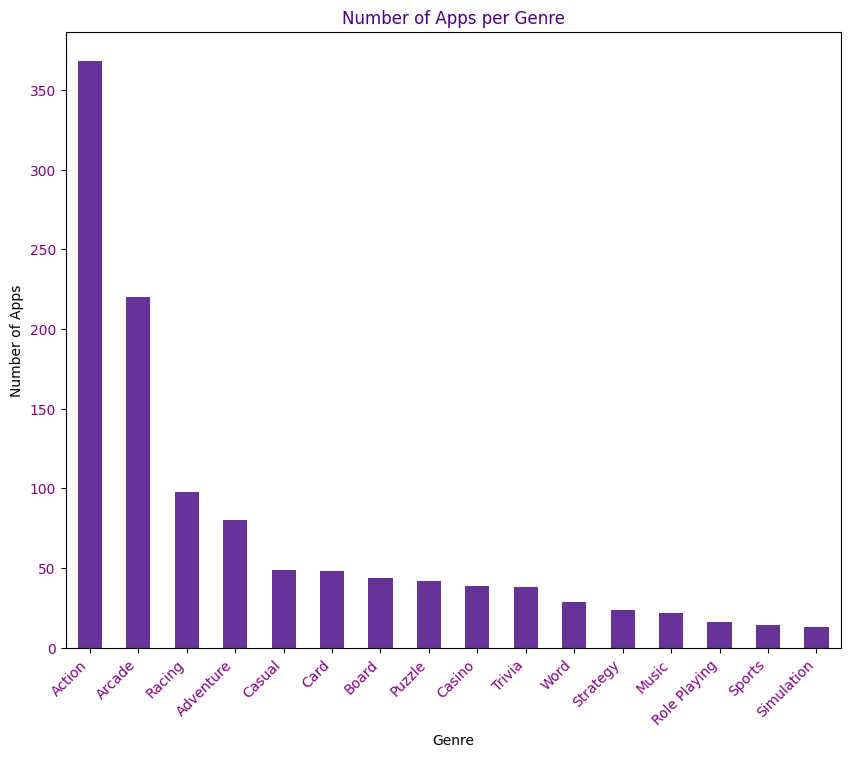

In [44]:
import matplotlib.pyplot as plt

# Count the number of apps per genre
genre_counts = games_df['Genres'].value_counts()

# Plotting with purple theme colors
plt.figure(figsize=(10, 8))
genre_counts.plot(kind='bar', color='rebeccapurple')  # Using a purple shade for bars
plt.title('Number of Apps per Genre', color='indigo')  # Indigo for the title
plt.xlabel('Genre', color='black')  # Plum for the x-axis label
plt.ylabel('Number of Apps', color='black')  # Plum for the y-axis label
plt.xticks(rotation=45, ha='right', color='purple')  # Lavender for the x-ticks
plt.yticks(color='purple')  # Lavender for the y-ticks
plt.show()

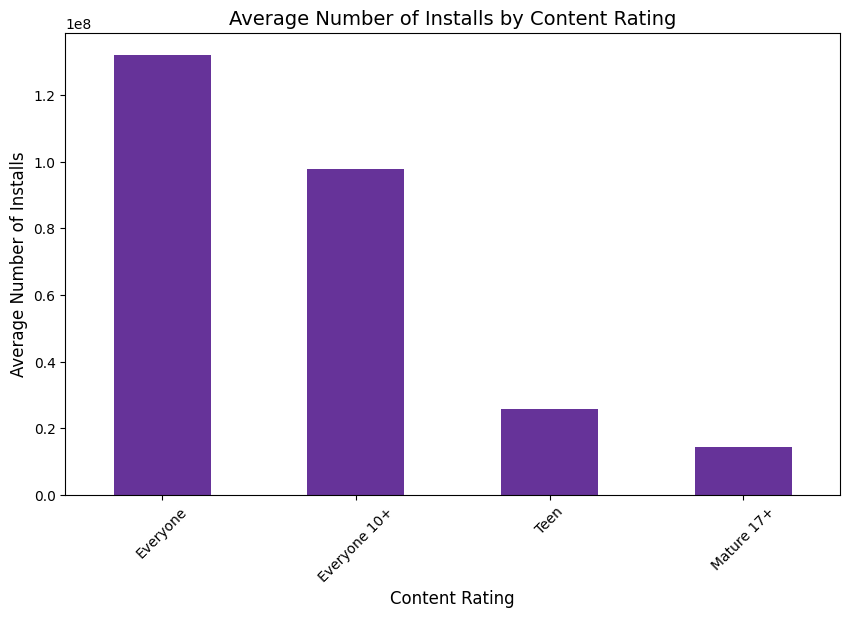

In [58]:
import numpy as np

# Aggregating installations for each content rating category
content_rating_installs = games_df.groupby('Content Rating')['Installs (more than)'].mean()

# Adjusting counts to include hierarchical nature of content ratings
content_rating_installs_adjusted = content_rating_installs.copy()
content_rating_installs_adjusted['Everyone'] += content_rating_installs['Everyone 10+'] + content_rating_installs['Mature 17+'] + content_rating_installs['Teen']
content_rating_installs_adjusted['Everyone 10+'] += content_rating_installs['Mature 17+'] + content_rating_installs['Teen']
content_rating_installs_adjusted['Teen'] += content_rating_installs['Mature 17+']

# Reordering the index to put 'Teen' before 'Mature 17+'
content_rating_installs_adjusted = content_rating_installs_adjusted.reindex(['Everyone', 'Everyone 10+', 'Teen', 'Mature 17+'])

# Plotting
plt.figure(figsize=(10, 6))
content_rating_installs_adjusted.plot(kind='bar', color='rebeccapurple')
plt.title('Average Number of Installs by Content Rating', fontsize=14)
plt.xlabel('Content Rating', fontsize=12)
plt.ylabel('Average Number of Installs', fontsize=12)
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

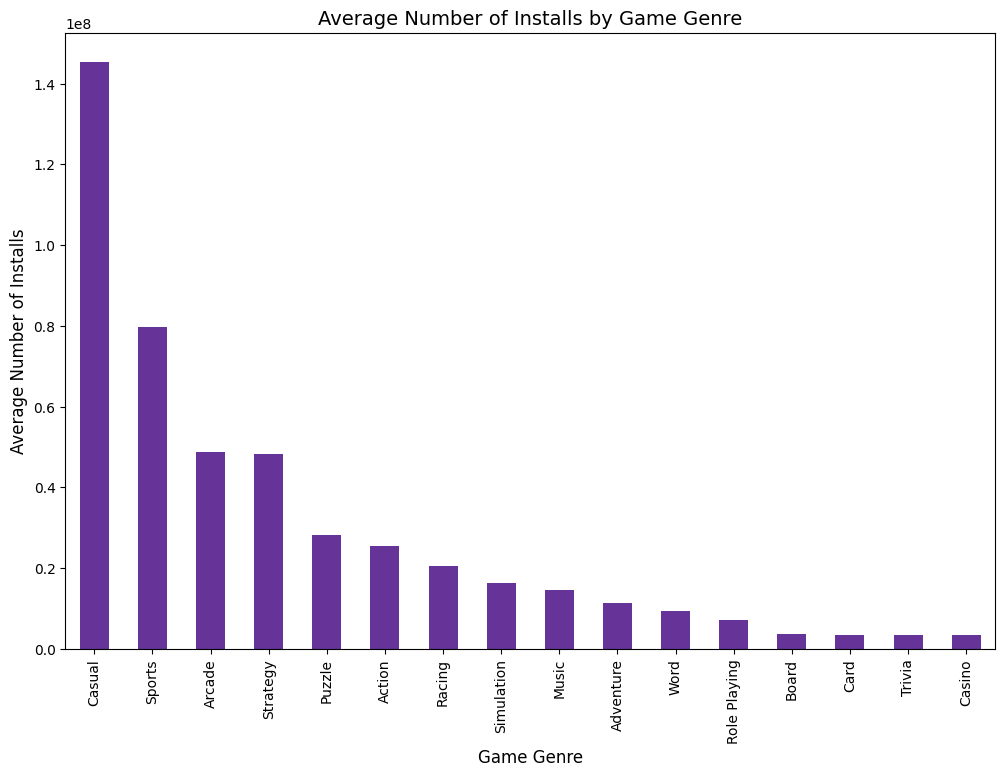

In [60]:
import matplotlib.pyplot as plt

# Calculating the mean installations for each genre
genre_installs_mean = games_df.groupby('Genres')['Installs (more than)'].mean().sort_values(ascending=False)

# Plotting the mean installations for each genre
plt.figure(figsize=(12, 8))
genre_installs_mean.plot(kind='bar', color='rebeccapurple')
plt.title('Average Number of Installs by Game Genre', fontsize=14)
plt.xlabel('Game Genre', fontsize=12)
plt.ylabel('Average Number of Installs', fontsize=12)
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

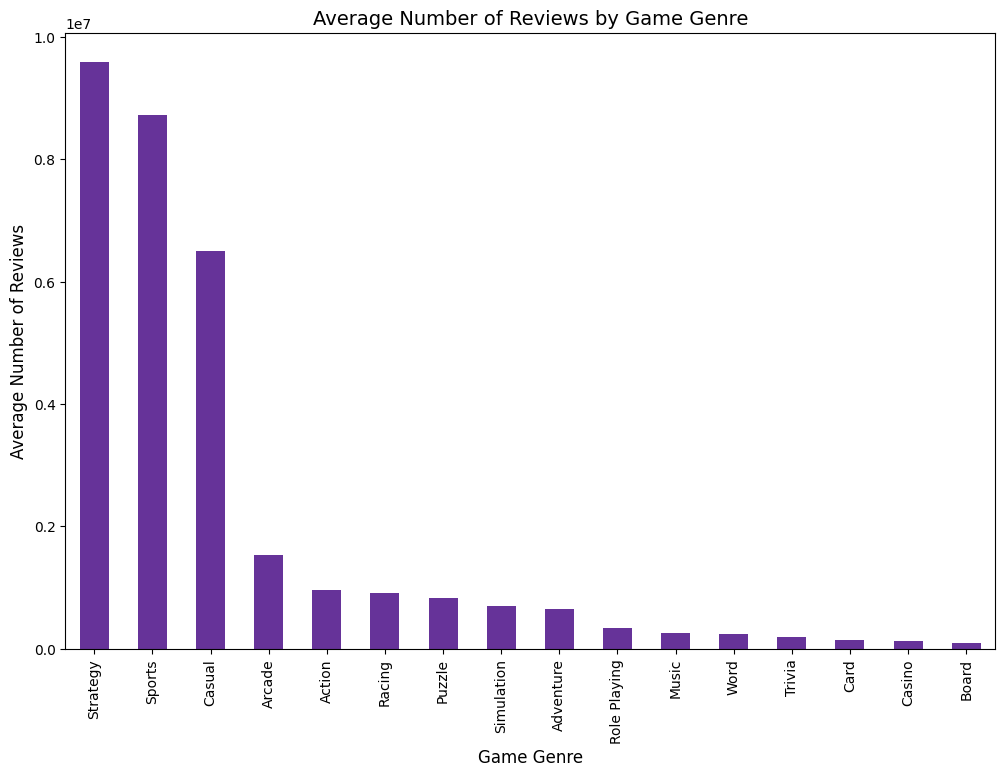

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Converting Reviews to numeric, errors='coerce' will set strings to NaN, then fillna with 0
games_df['Reviews'] = pd.to_numeric(games_df['Reviews'], errors='coerce').fillna(0)

# Calculating the mean reviews for each genre
genre_reviews_mean = games_df.groupby('Genres')['Reviews'].mean().sort_values(ascending=False)

# Plotting the mean reviews for each genre
plt.figure(figsize=(12, 8))
genre_reviews_mean.plot(kind='bar', color='rebeccapurple')
plt.title('Average Number of Reviews by Game Genre', fontsize=14)
plt.xlabel('Game Genre', fontsize=12)
plt.ylabel('Average Number of Reviews', fontsize=12)
plt.xticks(rotation=90)
plt.grid(False)
plt.show()